In [ ]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 17.8 MB/s eta 0:00:00


In [ ]:
!pip install accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.8 MB/s eta 0:00:00
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-hwpluhdo
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-hwpluhdo
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369499 sha256=3959d4104e7b12c3f8a63aa7283840d2a691e79e332757b826a21df717d4827b
  Stored in directory: /tmp/pip-ephem-wheel-cache-026spb_7/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
import numpy as np
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)


Torch version: 2.2.1+cu121


In [ ]:
import clip

In [ ]:
import os
import json
import pickle

# Image Generator

Importing necessary dependencies for the generator

In [ ]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image
import os

Main code of the generator:

In [ ]:
class ImageGenerator:
    def __init__(self, checkpoint="CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16):
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.model = StableDiffusionPipeline.from_pretrained(checkpoint, torch_dtype=torch_dtype)
        self.model = self.model.to(self.device)

    def generate_image(self, prompt):
        image = self.model(prompt).images[0]
        return image

    @staticmethod
    def save_image_to_drive(image, filename, save_dir='/content/drive/MyDrive/OOD_dataset'):
        os.makedirs(save_dir, exist_ok=True)
        save_path = os.path.join(save_dir, filename)
        image.save(save_path)

In [ ]:
generator = ImageGenerator(checkpoint='stabilityai/stable-diffusion-2-1')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/537 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/633 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/824 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/939 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

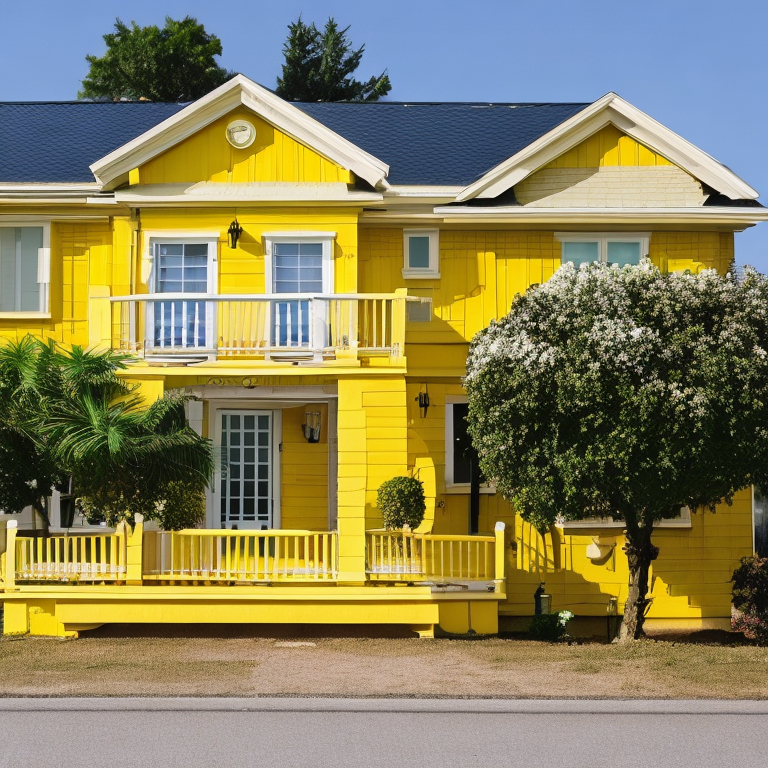

In [ ]:
generator.generate_image('front of a full yellow house')

# Image Captioner

Importing necessary dependencies for the captioner

In [ ]:
from transformers import AutoProcessor, AutoModelForCausalLM
import requests
import torch
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import re

Main code of the captioner:

In [ ]:
class ImageCaptioner:
    def __init__(self, checkpoint="microsoft/git-base-coco"):
        self.inputs = None
        self.outputs = None
        self.checkpoint = checkpoint
        self.processor = None
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.create_processor()
        self.create_model()
        self.tokenizer = self.create_tokenizer()
        self.generated_caption = None

    def create_processor(self):
        self.processor = AutoProcessor.from_pretrained(self.checkpoint)

    def create_model(self):
        self.model = AutoModelForCausalLM.from_pretrained(self.checkpoint)

    def create_tokenizer(self):
        auto_tokenizer = AutoTokenizer if 'vit' in self.checkpoint else AutoProcessor
        return auto_tokenizer.from_pretrained(self.checkpoint)

    def process_input(self, image):
        return self.processor(images=image, return_tensors="pt").to(self.device)

    def open_image(self, image):
        url = re.compile(
            r'^(?:http|ftp)s?://*', re.IGNORECASE)

        image_pattern = re.compile(r'.*\.(jpg|jpeg|png|gif|bmp|svg)$', re.IGNORECASE)
        if re.match(url, image):
            return Image.open(requests.get(image, stream=True).raw)
        elif re.match(image_pattern, image):
            return Image.open(image)
        else:
            raise ValueError("Neither URL nor Image")

    def generate_caption(self, image_url, max_length=50):
        image = self.open_image(image_url)
        self.inputs = self.process_input(image)
        pixel_values = self.inputs.pixel_values
        self.outputs = self.model.generate(pixel_values=pixel_values.to(self.device), max_length=max_length, return_dict_in_generate=True, output_scores=True)
        self.generated_caption = self.tokenizer.batch_decode(self.outputs.sequences, skip_special_tokens=True)[0]
        return [self.generated_caption, self.outputs]

    def display_image_with_caption(self, image_url):
        image = self.open_image(image_url)
        generated_caption = self.generate_caption(image_url)
        plt.imshow(image)
        plt.axis('off')
        plt.title(generated_caption[0])
        plt.show()

    def transition_scores(self):
        caption_id = 0
        generated_outputs = self.outputs
        generated_outputs.scores[0].shape, generated_outputs.scores[0][caption_id].shape
        return self.model.compute_transition_scores(generated_outputs.sequences, generated_outputs.scores, normalize_logits=True)

    def print_outputs(self):
        input_length = 1 if self.model.config.is_encoder_decoder else self.inputs.pixel_values.shape[1]
        input_length = 1

        for idx, output in enumerate(self.outputs.sequences):
            print(self.generated_caption[idx])
            caption_np = output.numpy()

            try:
                pad_index = np.where(caption_np==0)[0][0]
            except:
                pad_index = -1

            generated_tokens = output[input_length:pad_index]
            print(generated_tokens)
            for tok, score in zip(generated_tokens, self.transition_scores()[idx]):
                # | token | token string | logits | probability
                print(f"| {tok:5d} | {self.processor.decode(tok):8s} | {score.numpy():.3f} | {np.exp(score.numpy()):.2%}")

    def process_generated_outputs(self):
        input_length = 1 if self.model.config.is_encoder_decoder else self.inputs.pixel_values.shape[1]
        input_length = 1

        processed_outputs = []

        for idx, output in enumerate(self.outputs.sequences):
            caption = self.generated_caption[idx]
            caption_np = output.numpy()

            try:
                pad_index = np.where(caption_np==0)[0][0]
            except:
                pad_index = -1

            generated_tokens = output[input_length:pad_index]

            tokens_info = []
            for tok, score in zip(generated_tokens, self.transition_scores()[idx]):
                token_info = {
                    'token': int(tok),
                    'token_string': self.processor.decode(tok),
                    'logits': float(score.numpy()),
                    'probability': float(np.exp(score.numpy()))
                }
                tokens_info.append(token_info)

            processed_outputs.append({'caption': caption, 'tokens_info': tokens_info})

        return processed_outputs




**Generating captions with transition scores:**

In [ ]:
captioner = ImageCaptioner()

In [ ]:
def generate_dictionary(path):
    caption = captioner.generate_caption(path)[0]
    name = os.path.splitext(os.path.basename(path))[0]
    transition_scores = captioner.transition_scores()
    outputs = captioner.process_generated_outputs()
    captioner.print_outputs()
    object_dict = {name: {'path': path, 'caption': caption, 'transition_scores': transition_scores, 'outputs': outputs}}
    return object_dict

Green Lion

In [ ]:
result = {}

In [ ]:
#blue castle:
path = '/content/drive/MyDrive/ReCap_dataset/green_lion_bc/blue_castle_green_lion.png'
dict_gl_bc = generate_dictionary(path)

t
tensor([1996, 3317, 2003, 1037, 3317, 2008, 2003, 2112, 1997, 1996, 2155, 1005,
        1055, 2381, 1012])
|  1996 | the      | -2.199 | 11.09%
|  3317 | castle   | -1.154 | 31.54%
|  2003 | is       | -1.533 | 21.58%
|  1037 | a        | -2.348 | 9.55%
|  3317 | castle   | -2.049 | 12.89%
|  2008 | that     | -2.185 | 11.25%
|  2003 | is       | -2.279 | 10.24%
|  2112 | part     | -2.524 | 8.01%
|  1997 | of       | -0.281 | 75.50%
|  1996 | the      | -0.620 | 53.77%
|  2155 | family   | -2.552 | 7.79%
|  1005 | '        | -1.029 | 35.74%
|  1055 | s        | -0.058 | 94.38%
|  2381 | history  | -2.180 | 11.30%
|  1012 | .        | -0.808 | 44.56%


In [ ]:
result.update(dict_gl_bc)

In [ ]:
#pink tree:
path = '/content/drive/MyDrive/ReCap_dataset/green_lion_pt/pink_tree_green_lion.png'
dict_gl_pt = generate_dictionary(path)

d
tensor([3617, 2396, 3479, 2005, 1996, 1001])
|  3617 | digital  | -1.920 | 14.66%
|  2396 | art      | -0.116 | 89.06%
|  3479 | selected | -0.034 | 96.62%
|  2005 | for      | -0.058 | 94.38%
|  1996 | the      | -0.077 | 92.57%
|  1001 | #        | -0.027 | 97.29%


In [ ]:
result.update(dict_gl_pt)

In [ ]:
#yellow house:
path = '/content/drive/MyDrive/ReCap_dataset/green_lion_yh/yellow_house_green_lion.png'
dict_gl_yh = generate_dictionary(path)

a
tensor([1037, 3756, 2160, 2007, 1037, 7006, 1999, 2392])
|  1037 | a        | -1.060 | 34.65%
|  3756 | yellow   | -1.929 | 14.52%
|  2160 | house    | -0.435 | 64.75%
|  2007 | with     | -0.549 | 57.75%
|  1037 | a        | -0.170 | 84.39%
|  7006 | lion     | -0.815 | 44.25%
|  1999 | in       | -1.605 | 20.09%
|  2392 | front    | -0.471 | 62.43%


In [ ]:
result.update(dict_gl_yh)

**Orange Elephant**

In [ ]:
#blue castle:
path = '/content/drive/MyDrive/ReCap_dataset/orange_elephant_bc/blue_castle_orange_elephant.png'
dict_oe_bc = generate_dictionary(path)

t
tensor([ 1996, 10777,  2003,  1037,  6454,  1997,  1996,  2088,  1012])
|  1996 | the      | -2.055 | 12.81%
| 10777 | elephant | -2.616 | 7.31%
|  2003 | is       | -1.569 | 20.82%
|  1037 | a        | -1.861 | 15.54%
|  6454 | symbol   | -2.387 | 9.19%
|  1997 | of       | -0.254 | 77.56%
|  1996 | the      | -2.197 | 11.11%
|  2088 | world    | -2.442 | 8.70%
|  1012 | .        | -1.021 | 36.04%


In [ ]:
result.update(dict_oe_bc)

In [ ]:
#pink tree:
path = '/content/drive/MyDrive/ReCap_dataset/orange_elephant_pt/pink_tree_orange_elephant.png'
dict_oe_pt = generate_dictionary(path)

d
tensor([3617, 2396, 3479, 2005, 1996, 1001])
|  3617 | digital  | -1.752 | 17.35%
|  2396 | art      | -0.158 | 85.38%
|  3479 | selected | -0.037 | 96.41%
|  2005 | for      | -0.053 | 94.82%
|  1996 | the      | -0.068 | 93.45%
|  1001 | #        | -0.025 | 97.53%


In [ ]:
result.update(dict_oe_pt)

In [ ]:
#yellow house:
path = '/content/drive/MyDrive/ReCap_dataset/orange_elephant_yh/yellow_house_orange_elephant.png'
dict_oe_yh = generate_dictionary(path)

a
tensor([ 1037,  5016, 10777,  1999,  2392,  1997,  1037,  3756,  2160])
|  1037 | a        | -1.562 | 20.97%
|  5016 | giant    | -1.477 | 22.83%
| 10777 | elephant | -0.844 | 43.02%
|  1999 | in       | -1.739 | 17.57%
|  2392 | front    | -0.366 | 69.37%
|  1997 | of       | -0.112 | 89.40%
|  1037 | a        | -0.211 | 80.98%
|  3756 | yellow   | -0.720 | 48.70%
|  2160 | house    | -0.296 | 74.41%


In [ ]:
result.update(dict_oe_yh)

**Purple Deer**

In [ ]:
#blue castle:
path = '/content/drive/MyDrive/ReCap_dataset/purple_deer_bc/blue_castle_purple_deer.png'
dict_pd_bc = generate_dictionary(path)

t
tensor([1996, 6379, 8448, 2003, 1037, 6454, 1997, 1996, 2103, 1012])
|  1996 | the      | -2.209 | 10.98%
|  6379 | purple   | -3.418 | 3.28%
|  8448 | deer     | -1.388 | 24.95%
|  2003 | is       | -1.714 | 18.02%
|  1037 | a        | -1.981 | 13.79%
|  6454 | symbol   | -2.289 | 10.14%
|  1997 | of       | -0.173 | 84.08%
|  1996 | the      | -2.362 | 9.42%
|  2103 | city     | -3.314 | 3.64%
|  1012 | .        | -1.389 | 24.94%


In [ ]:
result.update(dict_pd_bc)

In [ ]:
#pink tree:
path = '/content/drive/MyDrive/ReCap_dataset/purple_deer_pt/pink_tree_purple_deer.png'
dict_pd_pt = generate_dictionary(path)

a
tensor([1037, 8448, 2104, 1037, 3392])
|  1037 | a        | -1.963 | 14.05%
|  8448 | deer     | -1.135 | 32.15%
|  2104 | under    | -1.472 | 22.94%
|  1037 | a        | -0.298 | 74.22%
|  3392 | tree     | -0.891 | 41.04%


In [ ]:
result.update(dict_pd_pt)

In [ ]:
#yellow house:
path = '/content/drive/MyDrive/ReCap_dataset/purple_deer_yh/yellow_house_purple_deer.png'
dict_pd_yh = generate_dictionary(path)

a
tensor([1037, 6379, 8448, 4832, 1999, 2392, 1997, 1037, 3756, 2160, 1012])
|  1037 | a        | -1.266 | 28.20%
|  6379 | purple   | -1.925 | 14.58%
|  8448 | deer     | -0.442 | 64.27%
|  4832 | stands   | -1.898 | 14.99%
|  1999 | in       | -0.640 | 52.76%
|  2392 | front    | -0.061 | 94.04%
|  1997 | of       | -0.111 | 89.49%
|  1037 | a        | -0.217 | 80.53%
|  3756 | yellow   | -0.468 | 62.65%
|  2160 | house    | -0.430 | 65.04%
|  1012 | .        | -0.973 | 37.78%


In [ ]:
result.update(dict_pd_yh)

**Red Monkey**

In [ ]:
#blue castle:
path = '/content/drive/MyDrive/ReCap_dataset/red_monkey_bc/blue_castle_red_monkey.png'
dict_rm_bc = generate_dictionary(path)

t
tensor([1996, 3317, 2003, 1037, 3317, 2008, 2003, 2112, 1997, 1996, 4323, 2380,
        1012])
|  1996 | the      | -2.310 | 9.93%
|  3317 | castle   | -1.941 | 14.36%
|  2003 | is       | -1.715 | 18.00%
|  1037 | a        | -2.411 | 8.97%
|  3317 | castle   | -2.399 | 9.08%
|  2008 | that     | -2.399 | 9.08%
|  2003 | is       | -2.480 | 8.38%
|  2112 | part     | -2.607 | 7.37%
|  1997 | of       | -0.233 | 79.25%
|  1996 | the      | -0.667 | 51.34%
|  4323 | theme    | -2.347 | 9.57%
|  2380 | park     | -0.409 | 66.46%
|  1012 | .        | -0.935 | 39.27%


In [ ]:
result.update(dict_rm_bc)

In [ ]:
#pink tree:
path = '/content/drive/MyDrive/ReCap_dataset/red_monkey_pt/pink_tree_red_monkey.png'
dict_rm_pt = generate_dictionary(path)

m
tensor([10608,  1999,  1037,  3392,  2011,  2711])
| 10608 | monkey   | -1.684 | 18.56%
|  1999 | in       | -1.529 | 21.67%
|  1037 | a        | -1.329 | 26.48%
|  3392 | tree     | -0.501 | 60.61%
|  2011 | by       | -0.710 | 49.17%
|  2711 | person   | -0.470 | 62.49%


In [ ]:
result.update(dict_rm_pt)

In [ ]:
#yellow house:
path = '/content/drive/MyDrive/ReCap_dataset/red_monkey_yh/yellow_house_red_monkey.png'
dict_rm_yh = generate_dictionary(path)

a
tensor([ 1037,  2417, 10608,  1999,  2392,  1997,  1037,  3756,  2160])
|  1037 | a        | -0.919 | 39.90%
|  2417 | red      | -1.651 | 19.19%
| 10608 | monkey   | -0.978 | 37.60%
|  1999 | in       | -0.839 | 43.22%
|  2392 | front    | -0.354 | 70.21%
|  1997 | of       | -0.110 | 89.57%
|  1037 | a        | -0.251 | 77.77%
|  3756 | yellow   | -0.425 | 65.34%
|  2160 | house    | -0.302 | 73.94%


In [ ]:
result.update(dict_rm_yh)

In [ ]:
result.keys()

dict_keys(['blue_castle_green_lion', 'pink_tree_green_lion', 'yellow_house_green_lion', 'blue_castle_orange_elephant', 'pink_tree_orange_elephant', 'yellow_house_orange_elephant', 'blue_castle_purple_deer', 'pink_tree_purple_deer', 'yellow_house_purple_deer', 'blue_castle_red_monkey', 'pink_tree_red_monkey', 'yellow_house_red_monkey'])

In [ ]:
directory = '/content/drive/MyDrive/ReCap_dataset'
filepath = os.path.join(directory, 'result.pkl')

with open(filepath, 'wb') as file:
    pickle.dump(result, file)

In [ ]:
directory = '/content/drive/MyDrive/ReCap_dataset'
filepath = os.path.join(directory, 'result.txt')

with open(filepath, 'w') as file:
    file.write(str(result))


# CLIP Similarity

In [ ]:
import numpy as np
import torch
from pkg_resources import packaging
import clip
import cv2

clip.available_models()
print("Torch version:", torch.__version__)


Torch version: 2.2.1+cu121


In [ ]:
clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [ ]:
clip.tokenize('hello')

tensor([[49406,  3306, 49407,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)

In [ ]:
import torch
import clip
from PIL import Image
import numpy as np
import cv2

class RelevanceEvaluator:
    def __init__(self, checkpoint="ViT-B/32"):
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.model, self.preprocess = clip.load(checkpoint, device=self.device)
        self.input_res = self.model.visual.input_resolution
        self.context_len = self.model.context_length
        self.vocab_size = self.model.vocab_size

    def extract_image_features(self, image_path):
        if isinstance(image_path, np.ndarray):
            image = image_path
        else:
            image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(image)
        image = self.preprocess(image).unsqueeze(0).to(self.device)
        with torch.no_grad():
            image_features = self.model.encode_image(image).float()
        return image_features

    def extract_text_features(self, texts):
        if isinstance(texts, str):
            texts = [texts]
        elif isinstance(texts, np.ndarray):
            texts = texts.tolist()
        elif isinstance(texts, list):
            texts = [str(text) for text in texts]

        text_tokens = clip.tokenize(texts).to(self.device)
        with torch.no_grad():
            text_features = self.model.encode_text(text_tokens).float()
        return text_features

    def measure_similarity(self, image_path, text):
        text_features = self.extract_text_features(text)
        image_features = self.extract_image_features(image_path)
        image_features /= image_features.norm(dim=-1, keepdim=True)
        text_features /= text_features.norm(dim=-1, keepdim=True)
        similarity = (text_features @ image_features.T).cpu().numpy()
        return similarity


In [ ]:
clip_sim = RelevanceEvaluator()

100%|███████████████████████████████████████| 338M/338M [00:04<00:00, 71.4MiB/s]


In [ ]:
evaluate_token = {'orange_elephant_pt': 'orange animal purple for the tree'
                  'green_lion_yh': 'a green animal in front of a yellow house'
                  'purple_dear_pt': 'a purple deer in front of a purple tree'}

In [ ]:
image = '/content/drive/MyDrive/ReCap_dataset/green_lion_bc/blue_castle_green_lion.png'
good_gl_bc = clip_sim.calculate_similarity(image, good_token.get('green_lion_bc'))

In [ ]:
good_token = {
                'green_lion_bc':'A green lion in front of a blue castle',
                'green_lion_pt':'A green lion in front of a pink tree',
                'green_lion_yh':'A green lion in front of a yellow house',
                'orange_elephant_bc': 'An orange elephant in front of a blue castle',
                'orange_elephant_pt': 'An orange elephant in front of a pink tree',
                'orange_elephant_yh': 'An orange elephant in front of a yellow house',
                'purple_dear_bc': 'A purple dear in front of a blue castle',
                'purple_dear_pt': 'A purple dear in front of a pink tree',
                'purple_dear_yh': 'A purple dear in front of a yellow house',
                'red_monkey_bc': 'A red monkey in front of a blue castle',
                'red_monkey_pt': 'A red monkey in front of a pink tree',
                'red_monkey_yh': 'A red monkey in front of a yellow house'
                }

In [ ]:
bad_token = {
                'green_lion_bc':'A pink dog in front of a red house',
                'green_lion_pt':'A pink dog in front of a green flag',
                'green_lion_yh':'A pink dog in front of a white balloon',
                'orange_elephant_bc': 'A purple mouse in front of a red house',
                'orange_elephant_pt': 'A purple mouse in front of a green flag',
                'orange_elephant_yh': 'A purple mouse in front of a white balloon',
                'purple_dear_bc': 'A brown cat in front of a red house',
                'purple_dear_pt': 'A brown cat in front of a green flag',
                'purple_dear_yh': 'A brown cat in front of a white balloon',
                'red_monkey_bc': 'A gray bear in front of a red house',
                'red_monkey_pt': 'A gray bear in front of a green flag',
                'red_monkey_yh': 'A gray bear in front of a white balloon'
                }

**Green Lion**

*Blue Castle*

In [ ]:
image = '/content/drive/MyDrive/ReCap_dataset/green_lion_bc/blue_castle_green_lion.png'
good_gl_bc = clip_sim.calculate_similarity(image, good_token.get('green_lion_bc'))

In [ ]:
good_gl_bc = clip_sim.calculate_similarity(image, good_token.get('green_lion_bc'))

In [ ]:
good_gl_bc.shape

(38, 1)

*Pink Tree*

In [ ]:
image = '/content/drive/MyDrive/ReCap_dataset/green_lion_pt/pink_tree_green_lion.png'

*Yellow House*

In [ ]:
image = '/content/drive/MyDrive/ReCap_dataset/green_lion_yh/yellow_house_green_lion.png'

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

class SimilarityVisualizer:
    def __init__(self, texts, similarity, image_directory):
        self.texts = texts
        self.similarity = similarity
        self.image_files = self._get_image_files(image_directory)
        self.count = len(texts)

    def _get_image_files(self, image_directory):
        image_files = []
        for file in os.listdir(image_directory):
            if file.endswith((".jpg", ".jpeg", ".png", ".gif", ".bmp")):
                image_files.append(os.path.join(image_directory, file))
        return image_files

    def _load_images(self):
        images = []
        for image_file in self.image_files:
            images.append(np.array(Image.open(image_file)))
        return images

    def _plot_similarity_matrix(self):
        plt.imshow(self.similarity, vmin=0.1, vmax=0.3)
        plt.yticks(range(self.count), self.texts, fontsize=18)
        plt.xticks([])
        for i, image in enumerate(self._load_images()):
            plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
        for x in range(self.similarity.shape[1]):
            for y in range(self.similarity.shape[0]):
                plt.text(x, y, f"{self.similarity[y, x]:.2f}", ha="center", va="center", size=12)

    def _customize_plot(self):
        for side in ["left", "top", "right", "bottom"]:
            plt.gca().spines[side].set_visible(False)
        plt.xlim([-0.5, self.count - 0.5])
        plt.ylim([self.count + 0.5, -2])
        plt.title("Cosine similarity between text and image features", size=20)

    def visualize_similarity(self):
        plt.figure(figsize=(20, 14))
        self._plot_similarity_matrix()
        self._customize_plot()
        plt.show()

In [ ]:
#Example usage:
texts = ["bear", "dog", "cat"]
similarity = np.random.rand(3, 3)
image_directory = "/content/drive/MyDrive/OOD_dataset/bear"

similarity_visualizer = SimilarityVisualizer(texts, similarity, image_directory)
similarity_visualizer.visualize_similarity()

# Implementation of ReCap

In [ ]:
class ReCap1:
    def __init__(self, image, caption, clip_checkpoint="ViT-B/32", generic=False):
        self.ClipModel = ClipChecker1(clip_checkpoint)
        self.object_reference = ['human', 'animal', 'machine', 'insect', 'device', 'building', 'plant', 'food', 'tool', 'instrument']
        self.feature_reference = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'white', 'black', 'purple']
        self.object_reference_clip_score = dict()
        self.feature_reference_clip_score = dict()
        self.T_hat = None
        self.image = image
        self.caption = caption
        self.candidate_segments = None
        self.candidate_tokens = None
        self.candidate_clip_score = dict()
        self.target_tokens = dict()
        self.generic = generic

    def run(self):
        self.filteration()
        if not (self.candidate_segments and self.candidate_tokens):# and self.T_hat):
            print("Assign candidate lists!")
            return
        self.relevance_evaluation()
        self.substitution()

    def filteration(self):
        self.text_filteration()
        self.image_filteration()

    def text_filteration(self):
        # it returns a list of triplets
        # T_c = {'token_1':{t_1, l_1, g_1},.... }
        print("Assign candidate_tokens in form of T_c = {'token_0':{t_0, l_0, g_0},.... }")

    def image_filteration(self):
        # it returns a list of duals
        # I_c = {'segment_1':{i_1, l_1},.... }
        print("Assign candidate_segments in form of I_c = {'segment_0':{i_0, l_0},.... }")

    def relevance_evaluation(self):
        self.calculate_candidate_clip_score()
        self.calculate_reference_clip_score()
        self.generate_target_tokens()

    def calculate_reference_clip_score(self):
        for i_id in range(len(self.candidate_segments)):
            i_k = self.candidate_segments[f"segment_{i_id}"]
            segment, i_label = i_k

            # Calculate similarity scores for object references
            for obj_id in range(len(self.object_reference)):
                obj_ref = self.object_reference[obj_id]
                clip_score = self.ClipModel.measure_similarity(segment, obj_ref)
                self.object_reference_clip_score[f"segment_{i_id}_obj_{obj_id}"] = clip_score

            # Calculate similarity scores for feature references
            for f_id in range(len(self.feature_reference)):
                f_ref = self.feature_reference[f_id]
                clip_score = self.ClipModel.measure_similarity(segment, f_ref)
                self.feature_reference_clip_score[f"segment_{i_id}_f_{f_id}"] = clip_score

    def calculate_candidate_clip_score(self):
        for i_id in range(len(self.candidate_segments)):
            i_k = self.candidate_segments[f"segment_{i_id}"]
            segment, i_label = i_k

            for t_id in range(len(self.candidate_tokens)):
                t_k = self.candidate_tokens[f"token_{t_id}"]
                token, t_label, g_label = t_k

                # If the labels match, calculate the similarity score
                if i_label == t_label:
                    clip_score = self.ClipModel.measure_similarity(segment, token)
                    self.candidate_clip_score[f"segment_{i_id}_token_{t_id}"] = clip_score



    def generate_target_tokens(self):
        for c_id, c_score in self.candidate_clip_score.items():
            c_id_split = c_id.split("_")    # "segment_{i_k}_token_{t_k}" -> segment, i_k, token, t_k
            i_id, t_id = c_id_split[1],  c_id_split[3]
            g_k = self.candidate_tokens[f"token_{t_id}"][-1] # either f or obj
            if g_k == "f":
                reference_clip_score = self.feature_reference_clip_score.copy()
            elif g_k == "obj":
                reference_clip_score = self.object_reference_clip_score.copy()
            ref_thr, ref_id = 0, None
            for ref_id, ref_score in reference_clip_score.items():
                if f"segment_{i_id}" in ref_id:
                    ref_id_split = ref_id.split("_")
                    id = ref_id_split[3]
                    thr = ref_score
                    if thr > ref_thr:
                        ref_thr = thr
                        ref_id = id
            if ref_thr > c_score:
                self.target_tokens[f"token_{t_id}"] = [ref_id, ref_thr]

    def substitution(self):
        self.T_hat = self.caption
        for target_token, ref in self.target_tokens.items():
            token = self.candidate_tokens[target_token][0]
            g = self.candidate_tokens[target_token][2]
            if g == "f":
                reference_list = self.feature_reference.copy()
            elif g == "obj":
                reference_list = self.object_reference.copy()
            substitute = reference_list[ref[0]]
            if self.generic:
                substitute = "unknown"
            T_hat = T_hat.replace(token, substitute)
        self.T_hat = T_hat


In [ ]:
import cv2
image = cv2.imread('/content/drive/MyDrive/ReCap_dataset/purple_deer_pt/pink_tree_purple_deer.png')
text = 'a gray deer in front of a green tree'
recap_instance = ReCap1(image=image, caption=text, clip_checkpoint="ViT-B/32", generic=False)
recap_instance.candidate_tokens = {
    'token_0': ('gray', 'fg', 'f'),
    'token_1': ('deer', 'fg', 'obj'),
    'token_2': ('pink', 'bg', 'f'),
    'token_3': ('house', 'bg', 'obj')
}
deer_segment = cv2.imread('/content/drive/MyDrive/ReCap_dataset/purple_deer_pt/purple_deer.png')
tree_segment = cv2.imread('/content/drive/MyDrive/ReCap_dataset/purple_deer_pt/pink_tree.png')
/content/sample_data
recap_instance.candidate_segments = {
    'segment_0': (deer_segment, 'fg'),
    'segment_1': (tree_segment, 'bg')
}
#1- Is the token "fg" or "bg"? Based on this, pick the segment.
# token_0 -> segment_0, token_1 -> segment_0,token_2 -> segment_1, token_3 -> segment_1
# token_0 -> segment_0 => score_0_0,  score_1_0 ...
#2-Is the token "f" or "obj"? Based on this, pick a ref set.
# token_0 -> feature_ref, token_1 -> obj_ref ...
#3- check between each segment with both feat_ref and obj_ref set


print(recap_instance.candidate_tokens)
print(recap_instance.candidate_segments)

100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 152MiB/s]


{'token_0': ('gray', 'fg', 'f'), 'token_1': ('deer', 'fg', 'obj'), 'token_2': ('pink', 'bg', 'f'), 'token_3': ('house', 'bg', 'obj')}
{'segment_0': (array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 'fg'), 'segment_1': (array([[[179, 156, 115],
    

In [ ]:
print(recap_instance.candidate_tokens)

{'token_0': ('gray', 'fg', 'f'), 'token_1': ('deer', 'fg', 'obj'), 'token_2': ('pink', 'bg', 'f'), 'token_3': ('house', 'bg', 'obj')}


In [ ]:
type(recap_instance.candidate_segments.get('segment_0')[0])

numpy.ndarray

In [ ]:
type(deer_segment)

numpy.ndarray

In [ ]:
recap_instance.calculate_reference_clip_score()

In [ ]:
fr_clip_score = recap_instance.feature_reference_clip_score

In [ ]:
fr_clip_score

{'segment_0_f_0': array([[0.24235536]], dtype=float32),
 'segment_0_f_1': array([[0.21176663]], dtype=float32),
 'segment_0_f_2': array([[0.20867145]], dtype=float32),
 'segment_0_f_3': array([[0.22878626]], dtype=float32),
 'segment_0_f_4': array([[0.20023273]], dtype=float32),
 'segment_0_f_5': array([[0.22224832]], dtype=float32),
 'segment_0_f_6': array([[0.24820252]], dtype=float32),
 'segment_0_f_7': array([[0.1940534]], dtype=float32),
 'segment_0_f_8': array([[0.19681683]], dtype=float32),
 'segment_0_f_9': array([[0.29160094]], dtype=float32),
 'segment_1_f_0': array([[0.21494536]], dtype=float32),
 'segment_1_f_1': array([[0.21713352]], dtype=float32),
 'segment_1_f_2': array([[0.20703994]], dtype=float32),
 'segment_1_f_3': array([[0.21212646]], dtype=float32),
 'segment_1_f_4': array([[0.20863433]], dtype=float32),
 'segment_1_f_5': array([[0.21419577]], dtype=float32),
 'segment_1_f_6': array([[0.22366801]], dtype=float32),
 'segment_1_f_7': array([[0.20228964]], dtype=flo

In [ ]:
or_clip_score = recap_instance.object_reference_clip_score

In [ ]:
or_clip_score

{'segment_0_obj_0': array([[0.2168165]], dtype=float32),
 'segment_0_obj_1': array([[0.25101683]], dtype=float32),
 'segment_0_obj_2': array([[0.20991443]], dtype=float32),
 'segment_0_obj_3': array([[0.2223583]], dtype=float32),
 'segment_0_obj_4': array([[0.22141084]], dtype=float32),
 'segment_0_obj_5': array([[0.19732377]], dtype=float32),
 'segment_0_obj_6': array([[0.21236542]], dtype=float32),
 'segment_0_obj_7': array([[0.20783612]], dtype=float32),
 'segment_0_obj_8': array([[0.20536096]], dtype=float32),
 'segment_0_obj_9': array([[0.21026997]], dtype=float32),
 'segment_1_obj_0': array([[0.21442434]], dtype=float32),
 'segment_1_obj_1': array([[0.20608158]], dtype=float32),
 'segment_1_obj_2': array([[0.21184276]], dtype=float32),
 'segment_1_obj_3': array([[0.19575876]], dtype=float32),
 'segment_1_obj_4': array([[0.20925647]], dtype=float32),
 'segment_1_obj_5': array([[0.19556569]], dtype=float32),
 'segment_1_obj_6': array([[0.23140474]], dtype=float32),
 'segment_1_obj_

In [ ]:
recap_instance.calculate_candidate_clip_score()

In [ ]:
c_clip_score = recap_instance.candidate_clip_score

In [ ]:
c_clip_score

{'segment_0_token_0': array([[0.20508936]], dtype=float32),
 'segment_0_token_1': array([[0.29905844]], dtype=float32),
 'segment_1_token_2': array([[0.27267802]], dtype=float32),
 'segment_1_token_3': array([[0.21064879]], dtype=float32)}

In [ ]:
recap_instance.generate_target_tokens()

In [ ]:
gt_tokens = recap_instance.target_tokens

In [ ]:
gt_tokens

{'token_0': ['segment_1_f_9', array([[0.29160094]], dtype=float32)],
 'token_3': ['segment_1_obj_9', array([[0.23140474]], dtype=float32)]}

In [ ]:
recap_instance.relevance_evaluation()

In [ ]:
recap_instance.feature_reference

['red',
 'orange',
 'yellow',
 'green',
 'blue',
 'indigo',
 'violet',
 'white',
 'black',
 'purple']

In [ ]:
recap_instance.object_reference

['human',
 'animal',
 'machine',
 'insect',
 'device',
 'building',
 'plant',
 'food',
 'tool',
 'instrument']

In [ ]:
!pip install pylint graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.3/276.3 kB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 15.1 MB/s eta 0:00:00


In [ ]:
code = '''
import torch
from transformers import AutoProcessor, AutoModelForCausalLM, AutoTokenizer
import requests
from PIL import Image
import re
import matplotlib.pyplot as plt
import numpy as np

class ImageCaptioner:
    def __init__(self, checkpoint="microsoft/git-base-coco"):
        self.inputs = None
        self.outputs = None
        self.checkpoint = checkpoint
        self.processor = None
        self.device = "cuda" if torch.cuda.is_available() else "cpu"
        self.create_processor()
        self.create_model()
        self.tokenizer = self.create_tokenizer()
        self.generated_caption = None

    def create_processor(self):
        self.processor = AutoProcessor.from_pretrained(self.checkpoint)

    def create_model(self):
        self.model = AutoModelForCausalLM.from_pretrained(self.checkpoint)

    def create_tokenizer(self):
        auto_tokenizer = AutoTokenizer if 'vit' in self.checkpoint else AutoProcessor
        return auto_tokenizer.from_pretrained(self.checkpoint)

    def process_input(self, image):
        return self.processor(images=image, return_tensors="pt").to(self.device)

    def open_image(self, image):
        url = re.compile(r'^(?:http|ftp)s?://*', re.IGNORECASE)
        image_pattern = re.compile(r'.*\.(jpg|jpeg|png|gif|bmp|svg)$', re.IGNORECASE)
        if re.match(url, image):
            return Image.open(requests.get(image, stream=True).raw)
        elif re.match(image_pattern, image):
            return Image.open(image)
        else:
            raise ValueError("Neither URL nor Image")

    def generate_caption(self, image_url, max_length=50):
        image = self.open_image(image_url)
        self.inputs = self.process_input(image)
        pixel_values = self.inputs.pixel_values
        self.outputs = self.model.generate(pixel_values=pixel_values.to(self.device), max_length=max_length, return_dict_in_generate=True, output_scores=True)
        self.generated_caption = self.tokenizer.batch_decode(self.outputs.sequences, skip_special_tokens=True)[0]
        return [self.generated_caption, self.outputs]

    def display_image_with_caption(self, image_url):
        image = self.open_image(image_url)
        generated_caption = self.generate_caption(image_url)
        plt.imshow(image)
        plt.axis('off')
        plt.title(generated_caption[0])
        plt.show()

    def transition_scores(self):
        caption_id = 0
        generated_outputs = self.outputs
        generated_outputs.scores[0].shape, generated_outputs.scores[0][caption_id].shape
        return self.model.compute_transition_scores(generated_outputs.sequences, generated_outputs.scores, normalize_logits=True)

    def print_outputs(self):
        input_length = 1 if self.model.config.is_encoder_decoder else self.inputs.pixel_values.shape[1]
        input_length = 1
        for idx, output in enumerate(self.outputs.sequences):
            print(self.generated_caption[idx])
            caption_np = output.numpy()
            try:
                pad_index = np.where(caption_np==0)[0][0]
            except:
                pad_index = -1
            generated_tokens = output[input_length:pad_index]
            print(generated_tokens)
            for tok, score in zip(generated_tokens, self.transition_scores()[idx]):
                # | token | token string | logits | probability
                print(f"| {tok:5d} | {self.processor.decode(tok):8s} | {score.numpy():.3f} | {np.exp(score.numpy()):.2%}")

    def process_generated_outputs(self):
        input_length = 1 if self.model.config.is_encoder_decoder else self.inputs.pixel_values.shape[1]
        input_length = 1
        processed_outputs = []
        for idx, output in enumerate(self.outputs.sequences):
            caption = self.generated_caption[idx]
            caption_np = output.numpy()
            try:
                pad_index = np.where(caption_np==0)[0][0]
            except:
                pad_index = -1
            generated_tokens = output[input_length:pad_index]
            tokens_info = []
            for tok, score in zip(generated_tokens, self.transition_scores()[idx]):
                token_info = {
                    'token': int(tok),
                    'token_string': self.processor.decode(tok),
                    'logits': float(score.numpy()),
                    'probability': float(np.exp(score.numpy()))
                }
                tokens_info.append(token_info)
            processed_outputs.append({'caption': caption, 'tokens_info': tokens_info})
        return processed_outputs
'''

with open('image_captioner.py', 'w') as f:
    f.write(code)


In [ ]:
!pyreverse -o png -p ImageCaptioner image_captioner.py


Format png is not supported natively. Pyreverse will try to generate it using Graphviz...


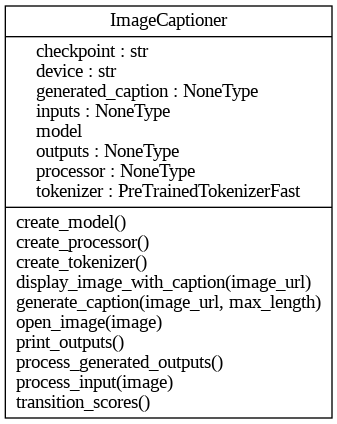

In [ ]:
from IPython.display import Image, display

display(Image(filename='classes_ImageCaptioner.png'))


In [ ]:
print(recap_instance.T_hat)

None


In [ ]:
import numpy as np

ref = ['segment_1_obj_9', np.array([[0.23140474]], dtype=np.float32)]
r_l = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'white', 'black']

# Assuming the objective is to create text from the array
array_text = np.array_str(ref[1])
print(array_text)  # This will print the array as a string

# Using array text in a sentence or for some other purpose
substitute = r_l[0]  # Here you would use an integer index
output_text = f"The reference color is {substitute} and the array value is {array_text}."
print(output_text)


[[0.23140474]]
The reference color is red and the array value is [[0.23140474]].


In [ ]:
recap_instance.object_reference_clip_score

{'segment_0_obj_0': array([[0.2168165]], dtype=float32),
 'segment_0_obj_1': array([[0.25101683]], dtype=float32),
 'segment_0_obj_2': array([[0.20991443]], dtype=float32),
 'segment_0_obj_3': array([[0.2223583]], dtype=float32),
 'segment_0_obj_4': array([[0.22141084]], dtype=float32),
 'segment_0_obj_5': array([[0.19732377]], dtype=float32),
 'segment_0_obj_6': array([[0.21236542]], dtype=float32),
 'segment_0_obj_7': array([[0.20783612]], dtype=float32),
 'segment_0_obj_8': array([[0.20536096]], dtype=float32),
 'segment_0_obj_9': array([[0.21026997]], dtype=float32),
 'segment_1_obj_0': array([[0.21442434]], dtype=float32),
 'segment_1_obj_1': array([[0.20608158]], dtype=float32),
 'segment_1_obj_2': array([[0.21184276]], dtype=float32),
 'segment_1_obj_3': array([[0.19575876]], dtype=float32),
 'segment_1_obj_4': array([[0.20925647]], dtype=float32),
 'segment_1_obj_5': array([[0.19556569]], dtype=float32),
 'segment_1_obj_6': array([[0.23140474]], dtype=float32),
 'segment_1_obj_

In [ ]:
recap_instance.feature_reference_clip_score

{'segment_0_f_0': array([[0.24235536]], dtype=float32),
 'segment_0_f_1': array([[0.21176663]], dtype=float32),
 'segment_0_f_2': array([[0.20867145]], dtype=float32),
 'segment_0_f_3': array([[0.22878626]], dtype=float32),
 'segment_0_f_4': array([[0.20023273]], dtype=float32),
 'segment_0_f_5': array([[0.22224832]], dtype=float32),
 'segment_0_f_6': array([[0.24820252]], dtype=float32),
 'segment_0_f_7': array([[0.1940534]], dtype=float32),
 'segment_0_f_8': array([[0.19681683]], dtype=float32),
 'segment_0_f_9': array([[0.29160094]], dtype=float32),
 'segment_1_f_0': array([[0.21494536]], dtype=float32),
 'segment_1_f_1': array([[0.21713352]], dtype=float32),
 'segment_1_f_2': array([[0.20703994]], dtype=float32),
 'segment_1_f_3': array([[0.21212646]], dtype=float32),
 'segment_1_f_4': array([[0.20863433]], dtype=float32),
 'segment_1_f_5': array([[0.21419577]], dtype=float32),
 'segment_1_f_6': array([[0.22366801]], dtype=float32),
 'segment_1_f_7': array([[0.20228964]], dtype=flo

In [ ]:
for tt, ref in recap_instance.target_tokens.items():
    token = recap_instance.candidate_tokens[tt]

In [ ]:
generic = False
substitute = None
recap_instance.T_hat = recap_instance.caption
for tt, ref in recap_instance.target_tokens.items():
    token = recap_instance.candidate_tokens[tt][0]
    print(tt)
    print(token)
    g = recap_instance.candidate_tokens[tt][2]
    print(g)
    if g == 'f':
        # Find the highest similarity score from feature_reference_clip_score
        highest_score = -1
        best_match = ''
        for key, score in recap_instance.feature_reference_clip_score.items():
            print(key, score)
            key_parts = key.split('_')
            print(key_parts)
            ref_type = key_parts[2]
            print(ref_type)
            ref_id = key_parts[-1]
            print(ref_id)
            if ref_type == 'f' and score > highest_score:
                highest_score = score
                best_match = recap_instance.feature_reference[int(ref_id)]
                print(best_match)
            elif g == 'obj':
                # Find the highest similarity score from object_reference_clip_score
                highest_score = -1
                best_match = ''
                for key, score in recap_instance.object_reference_clip_score.items():
                    print(f"Object key: {key}, Score: {score}")
                    key_parts = key.split('_')
                    ref_type = key_parts[2]
                    ref_id = key_parts[-1]
                    if ref_type == 'obj' and score > highest_score:
                        highest_score = score
                        best_match = recap_instance.object_reference[int(ref_id)]
                        print(best_match)
            recap_instance.T_hat = recap_instance.T_hat.replace(token, best_match)
            print(recap_instance.T_hat)

token_0
gray
f
segment_0_f_0 [[0.24235536]]
['segment', '0', 'f', '0']
f
0
red
a red deer in front of a green tree
segment_0_f_1 [[0.21176663]]
['segment', '0', 'f', '1']
f
1
a red deer in front of a green tree
segment_0_f_2 [[0.20867145]]
['segment', '0', 'f', '2']
f
2
a red deer in front of a green tree
segment_0_f_3 [[0.22878626]]
['segment', '0', 'f', '3']
f
3
a red deer in front of a green tree
segment_0_f_4 [[0.20023273]]
['segment', '0', 'f', '4']
f
4
a red deer in front of a green tree
segment_0_f_5 [[0.22224832]]
['segment', '0', 'f', '5']
f
5
a red deer in front of a green tree
segment_0_f_6 [[0.24820252]]
['segment', '0', 'f', '6']
f
6
violet
a red deer in front of a green tree
segment_0_f_7 [[0.1940534]]
['segment', '0', 'f', '7']
f
7
a red deer in front of a green tree
segment_0_f_8 [[0.19681683]]
['segment', '0', 'f', '8']
f
8
a red deer in front of a green tree
segment_0_f_9 [[0.29160094]]
['segment', '0', 'f', '9']
f
9
purple
a red deer in front of a green tree
segment_

In [ ]:
class ReCap:
    def __init__(self, image, caption, clip_checkpoint="ViT-B/32", generic=False):
        self.ClipModel = ClipChecker(clip_checkpoint)
        self.device = self.ClipModel.device
        self.object_reference = ['human', 'animal', 'machine', 'insect', 'device', 'building', 'plant', 'food', 'tool', 'instrument']
        self.feature_reference = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'white', 'black']
        self.object_reference_clip_score = dict()
        self.feature_reference_clip_score = dict()
        self.image = image  # Keep image as path
        self.caption = caption
        self.candidate_segments = None
        self.candidate_tokens = None
        self.candidate_clip_score = dict()
        self.target_tokens = dict()
        self.generic = generic
        self.T_hat = None


    def run(self):
        self.filteration()
        if not (self.candidate_segments and self.candidate_tokens and self.T_hat):
            print("Assign candidate lists!")
            return
        self.relevance_evaluation()
        self.substitution()

    def filteration(self):
        self.text_filteration()
        self.image_filteration()
        self.T_hat = self.caption

    def text_filteration(self):
        print("Assign candidate_tokens in form of T_c = {'token_0':{t_0, l_0, g_0},.... }")

    def image_filteration(self):
        print("Assign candidate_segments in form of I_c = {'segment_0':{i_0, l_0},.... }")

    def relevance_evaluation(self):
        self.calculate_candidate_clip_score()
        self.calculate_reference_clip_score()
        self.generate_target_tokens()

    def calculate_candidate_clip_score(self):
        for i_id in range(len(self.candidate_segments)):
            i_k = self.candidate_segments[f"segment_{i_id}"]
            segment, i_label = i_k
            for t_id in range(len(self.candidate_tokens)):
                t_k = self.candidate_tokens[f"token_{t_id}"]
                token, t_label, g_label = t_k
                if i_label == t_label:
                    clip_score = self.ClipModel.measure_similarity(self.image, token)
                    self.candidate_clip_score[f"segment_{i_id}_token_{t_id}"] = clip_score

    def calculate_reference_clip_score(self):
        for i_id in range(len(self.candidate_segments)):
            i_k = self.candidate_segments[f"segment_{i_id}"]
            segment, i_label = i_k
            for obj_id in range(len(self.object_reference)):
                obj_ref = self.object_reference[obj_id]
                clip_score = self.ClipModel.measure_similarity(self.image, obj_ref)
                self.object_reference_clip_score[f"segment_{i_id}_obj_{obj_id}"] = clip_score
            for f_id in range(len(self.feature_reference)):
                f_ref = self.feature_reference[f_id]
                clip_score = self.ClipModel.measure_similarity(self.image, f_ref)
                self.feature_reference_clip_score[f"segment_{i_id}_f_{f_id}"] = clip_score

    def generate_target_tokens(self):
        for c_id, c_score in self.candidate_clip_score.items():
            c_id_split = c_id.split("_")
            i_id, t_id = c_id_split[1], c_id_split[3]
            g_k = self.candidate_tokens[f"token_{t_id}"][-1]
            if g_k == "f":
                reference_clip_score = self.feature_reference_clip_score.copy()
            elif g_k == "obj":
                reference_clip_score = self.object_reference_clip_score.copy()
            ref_thr, ref_id = 0, None
            for ref_id, ref_score in reference_clip_score.items():
                if f"segment_{i_id}" in ref_id:
                    ref_id_split = ref_id.split("_")
                    id = ref_id_split[3]
                    thr = ref_score
                    if thr > ref_thr:
                        ref_thr = thr
                        ref_id = id
            if ref_thr > c_score:
                self.target_tokens[f"token_{t_id}"] = [ref_id, ref_thr]

    def substitution(self):
        self.T_hat = self.caption
        for target_token, ref in self.target_tokens.items():
            token = self.candidate_tokens[target_token][0]
            g = self.candidate_tokens[target_token][2]
            if g == "f":
                reference_list = self.feature_reference.copy()
            elif g == "obj":
                reference_list = self.object_reference.copy()
            substitute = reference_list[ref[0]]
            if self.generic:
                substitute = "unknown"
            T_hat = T_hat.replace(token, substitute)
        self.T_hat = T_hat


import cv2
image_path = '/content/drive/MyDrive/ReCap_dataset/purple_deer_pt/pink_tree_purple_deer.png'
text = 'a gray deer in front of a green tree'
recap_instance = ReCap(image=image_path, caption=text, clip_checkpoint="ViT-B/32", generic=False)
recap_instance.candidate_tokens = {
    'token_0': ('gray', 'color', 'f'),
    'token_1': ('deer', 'animal', 'obj'),
    'token_2': ('in', 'preposition', 'other'),
    'token_3': ('front', 'location', 'other'),
    'token_4': ('of', 'preposition', 'other'),
    'token_5': ('a', 'article', 'other'),
    'token_6': ('green', 'color', 'f'),
    'token_7': ('tree', 'plant', 'obj')
}

recap_instance.candidate_segments = {
    'segment_0': ('deer_segment', 'animal'),
    'segment_1': ('tree_segment', 'plant'),
    'segment_2': ('background_segment', 'background')
}

print(recap_instance.candidate_tokens)
print(recap_instance.candidate_segments)
recap_instance.calculate_candidate_clip_score()

{'token_0': ('gray', 'color', 'f'), 'token_1': ('deer', 'animal', 'obj'), 'token_2': ('in', 'preposition', 'other'), 'token_3': ('front', 'location', 'other'), 'token_4': ('of', 'preposition', 'other'), 'token_5': ('a', 'article', 'other'), 'token_6': ('green', 'color', 'f'), 'token_7': ('tree', 'plant', 'obj')}
{'segment_0': ('deer_segment', 'animal'), 'segment_1': ('tree_segment', 'plant'), 'segment_2': ('background_segment', 'background')}


In [ ]:
recap_instance.run()

In [ ]:
!pip freeze

absl-py==1.4.0
accelerate==0.30.1
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.6.0
anyio==3.7.1
appdirs==1.4.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
Babel==2.15.0
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.5.0
bleach==6.1.0
blinker==1.4
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
CacheControl==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.2.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
clip @ git+https://github.com/openai/CLIP.git@a1d071733d7111c9c014f024669f959182114e33
cloudpathlib==0.16.0
cloudpickle==2.2.1
cmake==3.27.9
cmdstanpy==1.2.2
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.4
co